In [106]:
# Dependencies and Setup
#%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

In [107]:
# Combine the data into a single dataset
df_raw = clinical_trial_data.merge(mouse_drug_data, on='Mouse ID')

# Display the data table for preview
df_raw.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [108]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
df = df_raw[['Drug','Timepoint','Tumor Volume (mm3)']]
grouped = df.groupby(['Drug', 'Timepoint'])

# Convert to DataFrame
df_tumor = grouped.mean()
df_tumor = df_tumor.reset_index()

# Preview DataFrame
df_tumor.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [109]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
df = df_raw[['Drug','Timepoint','Tumor Volume (mm3)']]
grouped = df.groupby(['Drug', 'Timepoint'])
df_tumor_sem = grouped.apply(lambda x: sem(x)[0])

# Convert to DataFrame
df_tumor_sem = df_tumor_sem.to_frame()
df_tumor_sem = df_tumor_sem.reset_index()
#df_tumor_sem = df_tumor_sem.rename(columns={'0':'Tumor Volume (mm3)'})  #Doesn't work??
df_tumor_sem.columns = ['Drug', 'Timepoint', 'Tumor Volume (mm3)']  #Can do this instead but idk why .rename doesn't work

# Preview DataFrame
df_tumor_sem.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [110]:
# Minor Data Munging to Re-Format the Data Frames
df_tumor_pivot = df_tumor.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
df_tumor_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [111]:
# Minor Data Munging to Re-Format the Data Frames
df_tumor_sem_pivot = df_tumor_sem.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
df_tumor_sem_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


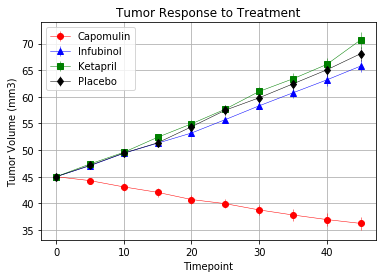

<Figure size 432x288 with 0 Axes>

In [112]:
# Generate the Plot (with Error Bars)
x_vals = df_tumor_pivot.index.tolist()

plt.errorbar(x_vals, df_tumor_pivot['Capomulin'], df_tumor_sem_pivot['Capomulin'], color='red', marker='o', label='Capomulin', linewidth=0.5)
plt.errorbar(x_vals, df_tumor_pivot['Infubinol'],  df_tumor_sem_pivot['Infubinol'], color='blue', marker='^', label='Infubinol', linewidth=0.5)
plt.errorbar(x_vals, df_tumor_pivot['Ketapril'],  df_tumor_sem_pivot['Ketapril'], color='green', marker='s', label='Ketapril', linewidth=0.5)
plt.errorbar(x_vals, df_tumor_pivot['Placebo'],  df_tumor_sem_pivot['Placebo'], color='black', marker='d', label='Placebo', linewidth=0.5)

plt.title('Tumor Response to Treatment')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)

plt.legend()
plt.show()

# Save the Figure
plt.savefig('tumor.png')

## Metastatic Response to Treatment

In [113]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint
df = df_raw[['Drug','Timepoint','Metastatic Sites']]
grouped = df.groupby(['Drug', 'Timepoint'])
df_met = grouped.mean()

# Preview DataFrame
df_met.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [114]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
df = df_raw[['Drug','Timepoint','Metastatic Sites']]
grouped = df.groupby(['Drug', 'Timepoint'])
df_met_sem = grouped.apply(lambda x: sem(x)[0]) #Need [0] because sem returns a one item list

# Convert to DataFrame
df_met_sem = df_met_sem.to_frame()
df_met_sem.columns = ['Metastatic Sites']

# Preview DataFrame
df_met_sem.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [115]:
# Minor Data Munging to Re-Format the Data Frames
df_met_pivot = df_met.reset_index().pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
df_met_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [116]:
# Minor Data Munging to Re-Format the Data Frames
df_met_sem_pivot = df_met_sem.reset_index().pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
df_met_sem_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


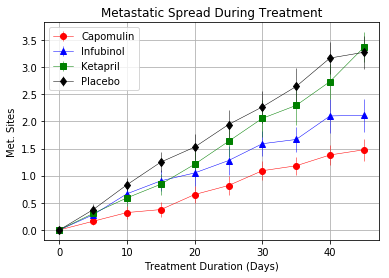

<Figure size 432x288 with 0 Axes>

In [117]:
# Generate the Plot (with Error Bars)
x_vals = df_met_pivot.index.tolist()

plt.errorbar(x_vals, df_met_pivot['Capomulin'], df_met_sem_pivot['Capomulin'], color='red', marker='o', label='Capomulin', linewidth=0.5)
plt.errorbar(x_vals, df_met_pivot['Infubinol'],  df_met_sem_pivot['Infubinol'], color='blue', marker='^', label='Infubinol', linewidth=0.5)
plt.errorbar(x_vals, df_met_pivot['Ketapril'],  df_met_sem_pivot['Ketapril'], color='green', marker='s', label='Ketapril', linewidth=0.5)
plt.errorbar(x_vals, df_met_pivot['Placebo'],  df_met_sem_pivot['Placebo'], color='black', marker='d', label='Placebo', linewidth=0.5)

plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
plt.grid(True)

plt.legend()
plt.show()

# Save the Figure
plt.savefig('metastatic_spread.png')

## Survival Rates

In [82]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
df = df_raw[['Drug','Timepoint','Mouse ID']]
grouped = df.groupby(['Drug', 'Timepoint'])
df_surv = grouped.nunique()['Mouse ID']

# Convert to DataFrame
df_surv = df_surv.to_frame()
df_surv = df_surv.reset_index()
df_surv = df_surv.rename(columns={'Mouse ID': 'Mouse Count'})

# Preview DataFrame
df_surv.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [84]:
# Minor Data Munging to Re-Format the Data Frames
df_surv_pivot = df_surv.pivot(index='Timepoint', columns='Drug', values='Mouse Count')

# Preview the Data Frame
df_surv_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


In [101]:
# Calculate pct of surviving mice
df_surv_pivot_pct = pd.DataFrame()
for drug in df_surv_pivot.columns.values:
    start_count = df_surv_pivot[drug][0]
    df_surv_pivot_pct[drug] = df_surv_pivot[drug] / start_count * 100.0
df_surv_pivot_pct.head()

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.0,100.0,96.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.0,96.0,88.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,64.0,96.0,88.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,64.0,92.0,80.0,68.0


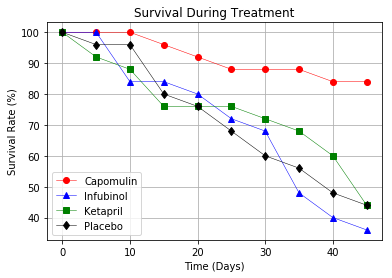

<Figure size 432x288 with 0 Axes>

In [104]:
# Generate the Plot (with Error Bars)
x_vals = df_surv_pivot_pct.index.tolist()

plt.plot(x_vals, df_surv_pivot_pct['Capomulin'], color='red', marker='o', label='Capomulin', linewidth=0.5)
plt.errorbar(x_vals, df_surv_pivot_pct['Infubinol'], color='blue', marker='^', label='Infubinol', linewidth=0.5)
plt.errorbar(x_vals, df_surv_pivot_pct['Ketapril'], color='green', marker='s', label='Ketapril', linewidth=0.5)
plt.errorbar(x_vals, df_surv_pivot_pct['Placebo'], color='black', marker='d', label='Placebo', linewidth=0.5)

plt.title('Survival During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.grid(True)

plt.legend()
plt.show()

# Save the Figure
plt.savefig('survival.png')


## Summary Bar Graph

In [162]:
# Calculate the percent changes for each drug
drugs = []
pct_change = []
for drug in df_tumor_pivot.columns.values:
    start_volume = df_tumor_pivot[drug][0]
    end_volume = df_tumor_pivot[drug].iloc[-1]
    drugs.append(drug)
    pct_change.append(100.0*(end_volume/start_volume - 1.0))

# Display the data to confirm
summary = pd.DataFrame({'Drug': drugs, 'Pct Change': pct_change})
summary

,Drug,Pct Change
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


In [164]:
# Splice the data between passing and failing drugs
summary['Passing'] = summary['Pct Change'].apply(lambda x: x<0.0)
summary

,Drug,Pct Change,Passing
0,Capomulin,-19.475303,True
1,Ceftamin,42.516492,False
2,Infubinol,46.123472,False
3,Ketapril,57.028795,False
4,Naftisol,53.923347,False
5,Placebo,51.297960,False
6,Propriva,47.241175,False
7,Ramicane,-22.320900,True
8,Stelasyn,52.085134,False
9,Zoniferol,46.579751,False


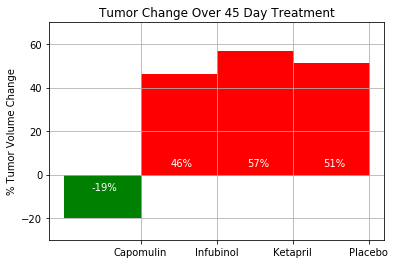

In [230]:
# Make Plot
x_vals = summary['Drug'].iloc[[0,2,3,5]]
y_vals = summary['Pct Change'].iloc[[0,2,3,5]]
handles = plt.bar(
    x=x_vals, 
    height=y_vals, 
    align='edge', 
    width=-1.0) # Negative in order to right-align labels, kinda hacky 

# Grid, title, axis label, tick spacing
plt.grid(True)
plt.yticks(range(-20, 61, 20))
plt.ylim(-30, 70)
plt.title('Tumor Change Over 45 Day Treatment')
plt.ylabel('% Tumor Volume Change')

# Color each bar and add value label
for handle in handles:
    x, y, h = handle.get_x(), handle.get_y(), handle.get_height()
    if (h > 0):
        handle.set_color('red')
        plt.text(x=x-0.6, y=y+4, s=str(int(h))+'%', color='white')
    else:
        handle.set_color('green')
        plt.text(x=x-0.65, y=y-7, s=str(int(h))+'%', color='white')
    
# Save the Figure
plt.savefig('summary.png')

# Show the Figure
plt.show()

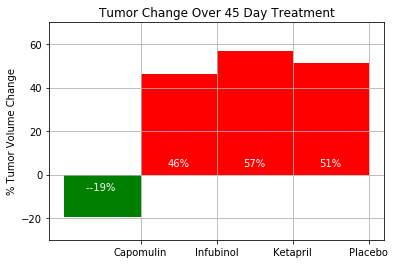